# Домашнее задание 5. Линейные модели

In [209]:
import random as pr
import numpy as np
import pandas as pd
import pylab as pl
import sklearn.cross_validation as cv
import sklearn.metrics as sm

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Зачитываем результат 4 домашки

In [210]:
data = np.load("out_4.dat.npz")
users = data["users"]
X_dataset = data["data"].reshape(1,)[0]

In [31]:
print data['users']

[  14876672  912850946  749731844 ..., 1488650232  539492347  874938366]


Зачитываем категории пользователей

In [211]:
TRAINING_SET_URL = "twitter_train.txt"
EXAMPLE_SET_URL = "twitter_example.txt"
df_users_train = pd.read_csv(TRAINING_SET_URL, sep=",", header=0)
df_users_ex = pd.read_csv(EXAMPLE_SET_URL, sep=",", header=0)
df_users_ex['cat'] = None
df_users = pd.concat([df_users_train, df_users_ex])

Модель строим для пользователей из twitter_train, нужно выбрать этих пользователей из матрицы из 4 ДЗ:

In [212]:
# TODO check this code
train_users = df_users_train["uid"].values
ix = np.in1d(users, train_users).reshape(users.shape)
X = X_dataset[np.where(ix)]

In [76]:
print len(ix)
print len(train_users)
print len([el for el in ix if el == True])
print '-'*20

6794
5000
4925
--------------------


Формируем целевую переменную: Делаем join списка пользователей из ДЗ4 с обучающей выборкой.

In [213]:
#Y = (df_users['cat'].values)
Y = np.array(
    [df_users['cat'].values[np.argwhere(df_users_train["uid"].values == user)[0][0]] for user in users[np.where(ix)]])

print "Resulting training set: (%dx%d) feature matrix, %d target vector" % (X.shape[0], X.shape[1], Y.shape[0])

Resulting training set: (4925x155207) feature matrix, 4925 target vector


Чтобы исследовать, как ведут себя признаки, построим распределение количества ненулевых признаков у пользователей, чтобы убедиться, что он удовлетворяет закону Ципфа. Для этого построим гистограмму в логарифмических осях. [Подсказка](http://anokhin.github.io/img/sf1.png)

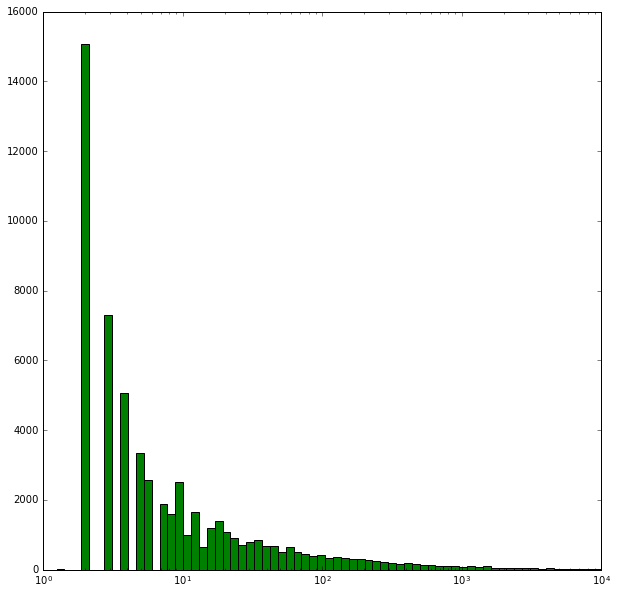

In [242]:
def draw_log_hist(x):
    """Draw tokens histogram in log scales"""
    
    a = np.sort(x.sum(axis=0))
    a = np.squeeze(np.asarray(a[a > 0]))
    pl.figure(figsize=(10,10))
    pl.hist(a, bins = np.logspace(0.1,4.0,70), color='g')
    pl.gca().set_xscale('log')
    pl.show()
    
features_counts = draw_log_hist(X)

Проведем отбор признаков. В самом простом случае просто удаляем признаки, имеющие ненулевое значение у менее, чем 100 пользователей.

In [38]:
X1 = X.tocsc()[:, features_counts > 100].toarray()

Вариант задания генерируется на основании вашего ника в техносфере.

In [172]:
USER_NAME = "a.tolkachev"
OPTIMIZATION_ALGORITHMS = ["stochastic gradient descent", "Newton method"]
REGULARIZATIONS = ["L1", "L2"]

print "My homework 5 algorithm is: Logistic regression with %s regularization optimized by %s" % (
    REGULARIZATIONS[hash(USER_NAME) % 2],
    OPTIMIZATION_ALGORITHMS[hash(USER_NAME[::-1]) % 2]
)

My homework 5 algorithm is: Logistic regression with L2 regularization optimized by Newton method


Реализуем выбранный алгоритм

In [41]:
class LogisticRegression():
    
    def fit(self, X, Y=None):
        return self
    
    def predict_proba(self, X):
        import numpy.random as nr
        return nr.random((X.shape[0], 2))

Реализуем метрику качества, используемую в соревновании: площадь под ROC кривой

In [42]:
def auroc(y_prob, y_true):
    return 0.5

Разделим выборку с помощью методики кросс-валидации для того, чтобы настроить параметр регуляризации $C$

In [43]:
C = [0.0, 0.01, 0.1, 1, 10, 100, 1000, 10000]

def select_reg_parameter(C, X, Y):
    return C.index(max(C))

index = select_reg_parameter(C, X1, Y)
print index


7


Выбираем наилучшее значение $C$, и классифицируем неизвестных пользователей и строим ROC-кривую

In [44]:
def classify(X, Y, test_size, C):
    tpr = [1] * 2400
    fpr = [0.01] * 2400
    roc_auc = 0.51
    
    return tpr, fpr, roc_auc

tpr, fpr, roc_auc = classify(X1, Y, 0.3, C[index])

print "Area under the ROC curve : %f" % roc_auc

def plot_roc_curve(tpr, fpr, roc_auc):
    """Plot ROC curve"""
    
    # Your code here
    
    return

plot_roc_curve(tpr, fpr, roc_auc)

Area under the ROC curve : 0.510000


С помощью полученной модели предсказываем категории для неизвестных пользователей из соревнования и загружаем на kaggle в нужном формате. ДЗ принимается только при наличии загруженных данных на kaggle.